<h1>Data Visualization Project - Team 1</h1>
Team 1 Members <br>
- James Brannan <br>
- Allison Chase <br>
- John Hayes <br>
- Ellis McWriter <br>
- Matthew Sanders <br>

Dataset Used: https://data.cms.gov/provider-data/dataset/4pq5-n9py <br><br>
**Skilled Nursing Facility Provider Information** - "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.”

---
<h2>Preparing the Data Set</h2>

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from pathlib import Path
import os
#Dependency needed for creating map imapge
from mpl_toolkits.basemap import Basemap
#Install Basemap from here if it's not working > conda install -c conda-forge basemap

# Idea to generate a random SNF to compare it to others in the category.
import random

In [2]:
#Graph Images folder path
highresfolder= 'HighResImages'

In [3]:
url="https://data.cms.gov/provider-data/api/1/metastore/schemas/dataset/items/4pq5-n9py?show-reference-ids=false"

In [4]:
print(requests.get(url))

<Response [200]>


In [5]:
print(requests.get(url).json())

{'accessLevel': 'public', 'landingPage': 'https://data.cms.gov/provider-data/dataset/4pq5-n9py', 'bureauCode': ['009:38'], 'issued': '2023-08-01', '@type': 'dcat:Dataset', 'modified': '2024-04-01', 'released': '2024-04-24', 'keyword': [{'identifier': 'd03021cc-311c-5181-8eb6-7ccf7e76fc53', 'data': 'General Information'}, {'identifier': '203355e5-2454-505d-b356-08de15938ab9', 'data': 'Address'}, {'identifier': 'c59e48c7-3cc5-5a09-adec-a49493db72f6', 'data': 'Location'}, {'identifier': '70a212e5-bf1b-5cad-9ecd-150dab2bacf9', 'data': 'Ratings'}, {'identifier': '107b8826-e90b-5db3-ac30-ecdb99c73db6', 'data': 'Beds'}, {'identifier': '5692b1a6-1c82-55c4-9698-c7441733b985', 'data': 'Quality'}, {'identifier': 'a6f7b7c6-d26e-5f59-8a5b-c151bacb9907', 'data': 'Staffing'}, {'identifier': '35df7004-e437-5a8a-a96b-1bda5456ccca', 'data': 'Penalties'}], 'contactPoint': {'@type': 'vcard:Contact', 'fn': 'Nursing homes including rehab services', 'hasEmail': 'mailto:BetterCare@cms.hhs.gov'}, 'publisher': 

In [6]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "%modified": "2024-04-12T16:05:17-0400",
    "@type": "dcat:Dataset",
    "accessLevel": "public",
    "bureauCode": [
        "009:38"
    ],
    "contactPoint": {
        "@type": "vcard:Contact",
        "fn": "Nursing homes including rehab services",
        "hasEmail": "mailto:BetterCare@cms.hhs.gov"
    },
    "description": "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.",
    "distribution": [
        {
            "data": {
                "%Ref:downloadURL": [
                    {
                        "data": {
                            "checksum": null,
                            "filePath": "s3://pdc-s3-nhc-data/NH_ProviderInfo_Apr2024.csv",
                            "identifier": "5eba4f43478aeb4d0ab8d071e1e4655d",
                            "mimeType": "text/csv",
           

In [7]:
response = requests.get(url).json()
print(json.dumps(response["distribution"][0]["data"]["downloadURL"], indent=4, sort_keys=True))

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [8]:
nursinghomedataURL = json.dumps(response["distribution"][0]["data"]['downloadURL'], indent=4, sort_keys=True)
print(nursinghomedataURL)

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [9]:
cleaned_string = nursinghomedataURL.replace('"', ' ').strip()

In [10]:
cleaned_string

'https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv'

In [11]:
# Define the full path to your Resources folder and the desired filename
path = Path("Resources")
filename = "NH_ProviderInfo_Apr2024.csv"

# Combine the path to the Resources folder with the desired filename
file_path = path / filename

# Ensure the directory exists (since it already should), but this will prevent errors
path.mkdir(parents=True, exist_ok=True)

# Download the file
response = requests.get(cleaned_string)
response.raise_for_status()  # Ensure that the download was successful

# Save the file
with open(file_path, 'wb') as file:
    file.write(response.content)

# Print the full file path where the file is saved
print(f"File successfully saved at {file_path}")

File successfully saved at Resources\NH_ProviderInfo_Apr2024.csv


In [12]:
# pd.read_csv(nursinghomedataURL).sample(5)
nursinghomedata=pd.read_csv(cleaned_string)
nursinghomedata.sample(5)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
12764,505261,LAKE RIDGE CENTER,817 EAST PLUM STREET,MOSES LAKE,WA,98837,5097657835,120,Grant,For profit - Corporation,...,2.0,2,302341.00,0,2,"817 EAST PLUM STREET,MOSES LAKE,WA,98837",47.1284,-119.264,NaN,2024-04-01
12202,455823,TREEMONT HEALTHCARE AND REHABILITATION CENTER,5550 HARVEST HILL RD,DALLAS,TX,75230,9726611862,390,Dallas,Government - Hospital district,...,3.0,7,314582.06,2,9,"5550 HARVEST HILL RD,DALLAS,TX,75230",32.9222,-96.815,NaN,2024-04-01
11964,445449,AHC WESTWOOD,524 WEST MAIN STREET,DECATURVILLE,TN,38329,7318523591,190,Decatur,For profit - Corporation,...,NaN,1,7445.75,0,1,"524 WEST MAIN STREET,DECATURVILLE,TN,38329",35.5814,-88.128,NaN,2024-04-01
2755,115719,PRUITTHEALTH - ROME,2 THREE MILE ROAD NE,ROME,GA,30165,7062366002,460,Floyd,For profit - Limited Liability company,...,0.0,1,3464.50,0,1,"2 THREE MILE ROAD NE,ROME,GA,30165",34.2996,-85.177,NaN,2024-04-01
1761,105158,TALLAHASSEE MEMORIAL HOSPITAL EXTENDED CARE,1609 MEDICAL DR,TALLAHASSEE,FL,32308,8504315440,360,Leon,Non profit - Corporation,...,0.0,1,650.00,0,1,"1609 MEDICAL DR,TALLAHASSEE,FL,32308",30.4595,-84.260,NaN,2024-04-01


In [13]:
# Drop columns that are not needed
nursinghomedataREDUCED=nursinghomedata.drop(columns=['Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating',
                                                    'Short-Stay QM Rating',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating Footnote',
                                                    'Number of administrators who have left the nursing home',
                                                    'Average Number of Residents per Day Footnote',
                                                    'Provider Type',
                                                    'Number of Citations from Infection Control Inspections',
                                                    'Provider Resides in Hospital',
                                                    'Special Focus Status',
                                                    'Automatic Sprinkler Systems in All Required Areas',
                                                    'Overall Rating Footnote',
                                                    'Health Inspection Rating Footnote',
                                                    'QM Rating Footnote',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Geocoding Footnote',
                                                    'Processing Date',
                                                    'Provider SSA County Code',
                                                    'Staffing Rating Footnote',
                                                    'Reported Staffing Footnote',
                                                    'Physical Therapist Staffing Footnote',
                                                    'Total nursing staff turnover footnote',
                                                    'Registered Nurse turnover footnote',
                                                    'Administrator turnover footnote',
                                                    'Telephone Number',
                                                    'ZIP Code',
                                                    'County/Parish',
                                                    'Legal Business Name',
                                                    'Continuing Care Retirement Community',
                                                    'Abuse Icon',
                                                    'Affiliated Entity Name', 
                                                    'Affiliated Entity ID',
                                                    'Provider Changed Ownership in Last 12 Months',
                                                    'Most Recent Health Inspection More Than 2 Years Ago',
                                                    'Provider Resides in Hospital',
                                                    'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
                                                    'Case-Mix LPN Staffing Hours per Resident per Day',
                                                    'Case-Mix RN Staffing Hours per Resident per Day',
                                                    'Case-Mix Total Nurse Staffing Hours per Resident per Day',
                                                    'Provider Address',
                                                    'City/Town',
                                                    'Date First Approved to Provide Medicare and Medicaid Services',
                                                    'Provider Name',
                                                    'With a Resident and Family Council',
                                             ])   

# nursinghomedataREDUCED.sample(25)

In [14]:
# nursinghomedataREDUCED.columns

In [15]:
# Removing off states, like Guam
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

---
<h2>Exploring Data: Average Nursing Home Ratings by State</h2>

In [16]:
# Getting Specific Data Columns for XX State
HawaiiData = nursinghomedataREDUCED.loc[nursinghomedata['State'] == ("HI")]
HawaiiData.head()

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
2777,125002,HI,Government - State,40,44.9,5.0,4.0,5.0,5.0,2.91255,...,44.667,1,0,2,23782.50,0,2,"1190 WAIANUENUE AVENUE,HILO,HI,96720",19.7175,-155.113
2778,125003,HI,Non profit - Corporation,105,94.8,4.0,3.0,5.0,4.0,3.29870,...,54.000,1,4,0,0.00,0,0,"100 KEOKEA PLACE,KULA,HI,96790",20.7018,-156.357
2779,125004,HI,For profit - Limited Liability company,110,69.0,4.0,3.0,4.0,5.0,1.99803,...,61.333,4,2,0,0.00,0,0,"3-3420 KUHIO HIGHWAY, SUITE 300,LIHUE,HI,96766",21.9789,-159.367
2780,125007,HI,Non profit - Corporation,252,214.5,2.0,1.0,5.0,5.0,2.56239,...,220.833,8,7,5,233142.14,0,5,"472 KAULANA STREET,KAHULUI,HI,96732",20.8792,-156.476
2781,125009,HI,Government - State,158,75.8,5.0,5.0,4.0,4.0,2.53511,...,38.667,0,0,0,0.00,0,0,"1027 HALA DRIVE,HONOLULU,HI,96817",21.3297,-157.861


In [17]:
# Removing non-states: Guam; Washington, D.C.; and Puerto Rico
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

In [18]:
sortedNHD= statetrimedNHD.groupby("State")
sortedNHD.head()

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
0,015009,AL,For profit - Corporation,57,51.2,2.0,2.0,4.0,3.0,2.54923,...,31.333,2,0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736
1,015010,AL,For profit - Corporation,85,80.4,4.0,4.0,3.0,3.0,2.59139,...,6.667,0,0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254
2,015012,AL,Government - County,50,40.5,4.0,4.0,2.0,4.0,3.50215,...,13.333,0,0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047
3,015014,AL,For profit - Individual,92,75.9,3.0,3.0,4.0,2.0,1.85428,...,20.667,0,0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722
4,015015,AL,For profit - Individual,103,85.5,2.0,2.0,3.0,4.0,2.21479,...,26.667,0,1,1,975.00,0,1,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,535013,WY,For profit - Limited Liability company,146,87.6,1.0,2.0,3.0,1.0,1.67909,...,55.333,0,11,4,26048.75,0,4,"3128 BOXELDER DRIVE,CHEYENNE,WY,82001",41.1391,-104.777
13353,535017,WY,Non profit - Corporation,50,36.9,5.0,4.0,5.0,4.0,2.23379,...,22.667,2,0,2,4565.60,0,2,"333 N BRIDGER AVE,PINEDALE,WY,82941",42.8697,-109.857
13354,535021,WY,Government - State,90,81.3,3.0,3.0,2.0,4.0,2.65335,...,27.333,1,0,1,7442.50,0,1,"890 US HWY 20 SOUTH,BASIN,WY,82410",44.3602,-108.039
13355,535022,WY,Government - Hospital district,160,105.8,2.0,2.0,3.0,4.0,2.93497,...,44.000,0,10,0,0.00,0,0,"1000 S DOUGLAS HWY,GILLETTE,WY,82716",44.2834,-105.494


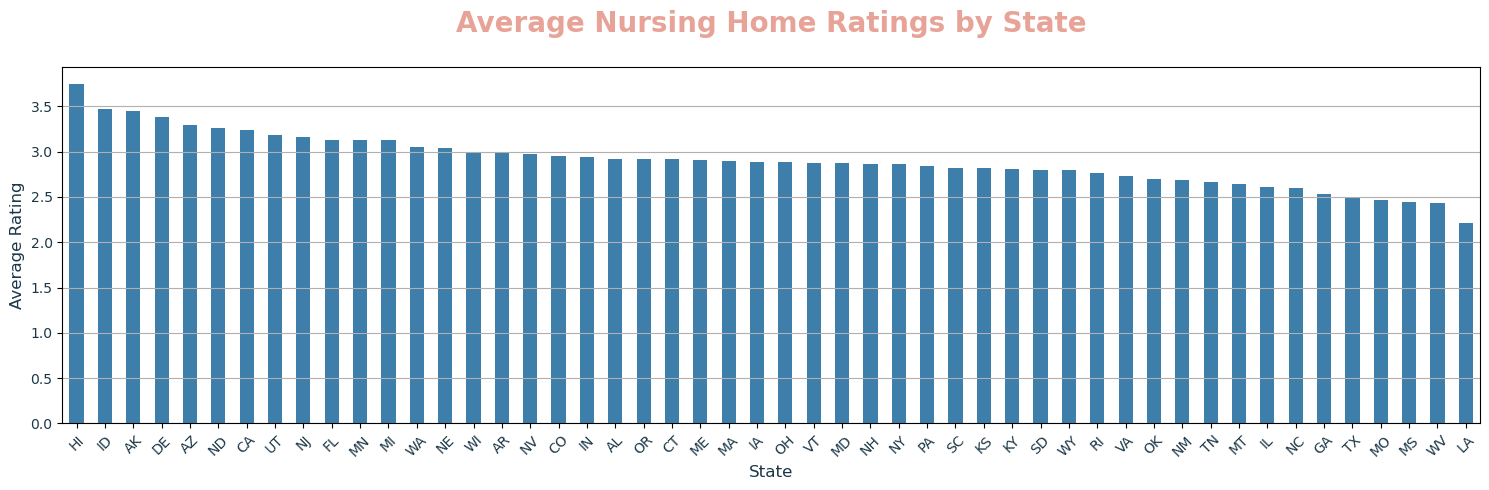

In [19]:
# Define the path for saving the image
#images_folder = Path("HighResImages")
#images_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
#save_path = images_folder / "State_Ratings_Mean.png"

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the axes object
state_ratings_mean.plot(kind='bar', ax=ax, color=('#3D7EAB'))

# Set labels and title
ax.set_xlabel('State', color=('#1B3747'), fontsize=12)
ax.set_ylabel('Average Rating', color=('#1B3747'), fontsize=12)
ax.set_title('Average Nursing Home Ratings by State', pad = 25, fontsize=20, color=('#E8A398'), weight='bold')


# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45, color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.grid(axis='y')
plt.tight_layout()

# Save the figure using the fig object directly
#fig.savefig(save_path)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar_Average_Nursing_Home_ratings_by_state.png'))

# Display the plot
plt.show()

#print(f"Bar chart successfully saved to {path}")

---
<h2>Exploring Data: How does the staffing levels of nursing homes relate to their Five-Star Rating System scores?</h2>

---
<h2>Exploring Data: Ownership Type - Relationships</h2>

In [20]:
# Calculate the number of fines for each 'Ownership Type'
fines_by_ownership = nursinghomedataREDUCED.groupby('Ownership Type')['Number of Fines'].count()

print(fines_by_ownership)

Ownership Type
For profit - Corporation                  6074
For profit - Individual                    763
For profit - Limited Liability company    3350
For profit - Partnership                   553
Government - City                           57
Government - City/county                    61
Government - County                        368
Government - Federal                        22
Government - Hospital district             266
Government - State                         158
Non profit - Church related                331
Non profit - Corporation                  2545
Non profit - Other                         312
Name: Number of Fines, dtype: int64


In [21]:
# Calculate the average number fines each 'Ownership Type'
fines_by_ownership = nursinghomedataREDUCED.groupby('Ownership Type')['Number of Fines'].mean()

print(fines_by_ownership)

Ownership Type
For profit - Corporation                  2.137142
For profit - Individual                   2.487549
For profit - Limited Liability company    2.617910
For profit - Partnership                  2.566004
Government - City                         2.473684
Government - City/county                  1.672131
Government - County                       1.880435
Government - Federal                      1.954545
Government - Hospital district            2.469925
Government - State                        1.708861
Non profit - Church related               1.830816
Non profit - Corporation                  1.696267
Non profit - Other                        2.166667
Name: Number of Fines, dtype: float64


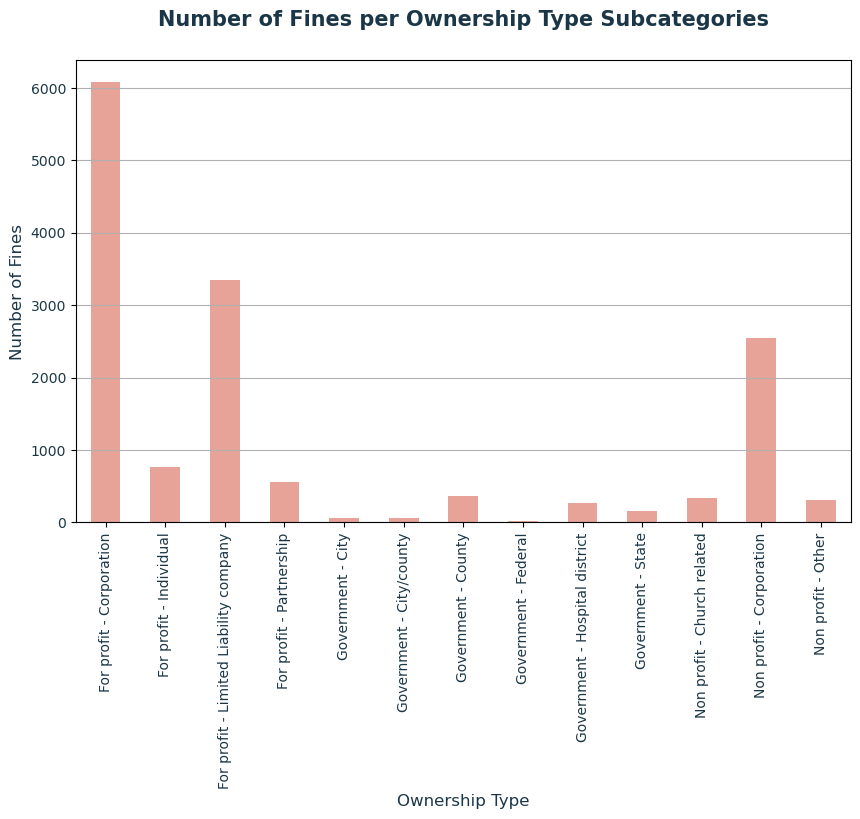

In [22]:
# Calculate the number of fines based on the 'Ownership Type' column
fines_by_ownership = nursinghomedataREDUCED.groupby('Ownership Type')['Number of Fines'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
fines_by_ownership.plot(kind='bar', color='#E8A398')
plt.xlabel('Ownership Type', color=('#1B3747'), fontsize=12)
plt.ylabel('Number of Fines', color=('#1B3747'), fontsize=12)
plt.title('Number of Fines per Ownership Type Subcategories', color=('#1B3747'), pad = 25, fontsize=15, weight='bold')
plt.xticks(rotation=90, color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.grid(axis='y')
ax.set_facecolor('#FCF1E0')
fig.patch.set_facecolor('#FCF1E0')


# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar_Number of Fines per Ownership Type Subcategories.png'))

plt.show()

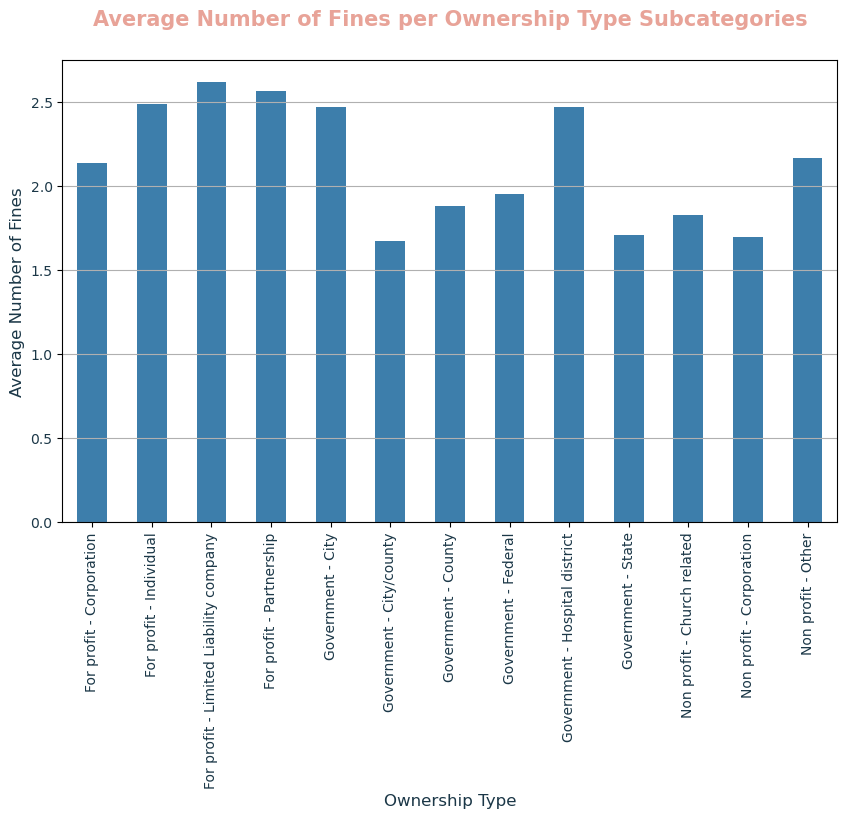

In [23]:
# Calculate the number of fines based on the 'Ownership Type' column
fines_by_ownership = nursinghomedataREDUCED.groupby('Ownership Type')['Number of Fines'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
fines_by_ownership.plot(kind='bar', color=('#3D7EAB'))
plt.xlabel('Ownership Type', color=('#1B3747'), fontsize=12)
plt.ylabel('Average Number of Fines', color=('#1B3747'), fontsize=12)
plt.title('Average Number of Fines per Ownership Type Subcategories',  pad = 25, fontsize=15, color=('#E8A398'), weight='bold')
plt.xticks(rotation=90, color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.grid(axis='y')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar_Average Number of Fines per Ownership Type Subcategories.png'))

plt.show()

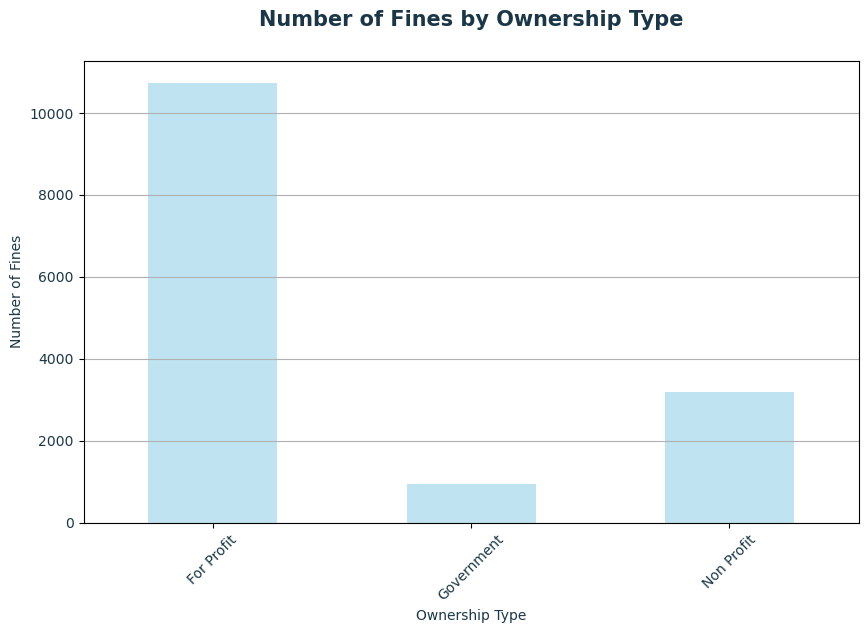

In [24]:
# Create a new column to categorize the subcategories into main categories
nursinghomedataREDUCED['Main Category'] = nursinghomedataREDUCED['Ownership Type'].replace({
    'For profit - Corporation': 'For Profit',
    'Government - County': 'Government',
    'For profit - Individual': 'For Profit',
    'For profit - Limited Liability company': 'For Profit',
    'Non profit - Corporation': 'Non Profit',
    'Non profit - Other': 'Non Profit',
    'For profit - Partnership': 'For Profit',
    'Government - City': 'Government',
    'Non profit - Church related': 'Non Profit',
    'Government - City/county': 'Government',
    'Government - Federal': 'Government',
    'Government - State': 'Government',
    'Government - Hospital district': 'Government'
})

# Group the data based on the new main category
grouped_data = nursinghomedataREDUCED.groupby('Main Category')['Number of Fines'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color=('#BFE3F0'))
plt.xlabel('Ownership Type', color=('#1B3747'))
plt.ylabel('Number of Fines', color=('#1B3747'))
plt.title('Number of Fines by Ownership Type', color=('#1B3747'), pad = 25, fontsize=15, weight='bold')
plt.xticks(rotation=45, color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.grid(axis='y')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar Number of Fines by Ownership Type .png'))

plt.show()

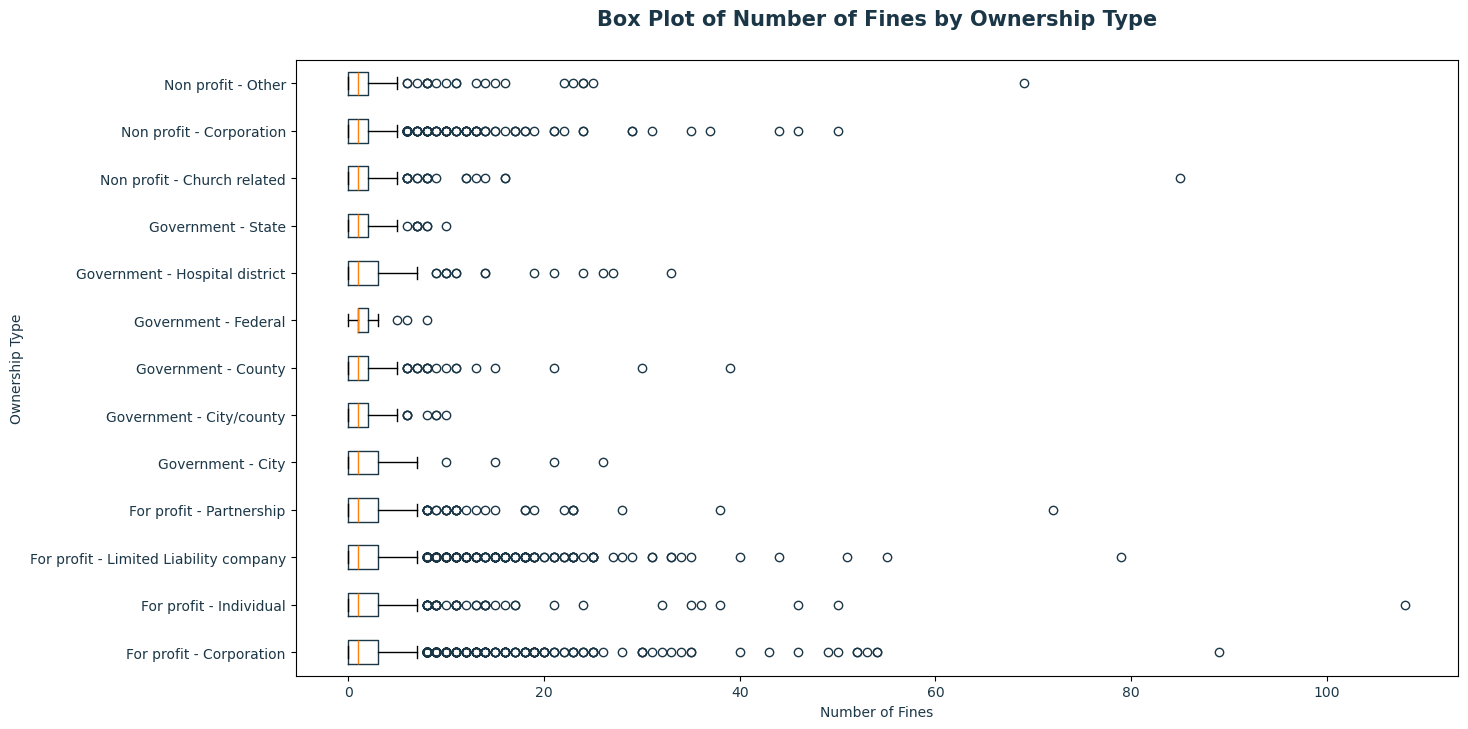

In [81]:
grouped_data = nursinghomedataREDUCED.groupby('Ownership Type')['Number of Fines']

# Create a box plot for each ownership type group
plt.figure(figsize=(15,8))
plt.boxplot([group.values for name, group in grouped_data], labels=[name for name, group in grouped_data], vert=False, boxprops=dict(color='#1B3747'), flierprops=dict(marker='o', markeredgecolor='#1B3747'))
plt.ylabel('Ownership Type', color='#1B3747')
plt.xlabel('Number of Fines', color='#1B3747')
plt.title('Box Plot of Number of Fines by Ownership Type', color='#1B3747',pad = 25, fontsize=15, weight='bold')
plt.xticks(rotation=0, color=('#1B3747'))
plt.yticks(color='#1B3747')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'Box Plot of Number of Fines by Ownership Type'))

plt.show()

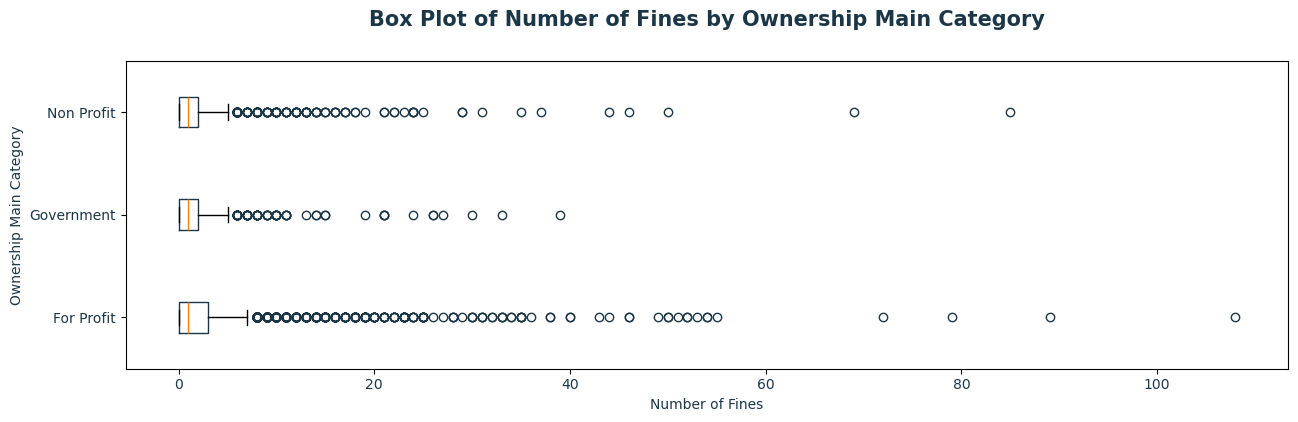

In [80]:
# Create a new column to categorize the subcategories into main categories
nursinghomedataREDUCED['Main Category'] = nursinghomedataREDUCED['Ownership Type'].replace({
    'For profit - Corporation': 'For Profit',
    'Government - County': 'Government',
    'For profit - Individual': 'For Profit',
    'For profit - Limited Liability company': 'For Profit',
    'Non profit - Corporation': 'Non Profit',
    'Non profit - Other': 'Non Profit',
    'For profit - Partnership': 'For Profit',
    'Government - City': 'Government',
    'Non profit - Church related': 'Non Profit',
    'Government - City/county': 'Government',
    'Government - Federal': 'Government',
    'Government - State': 'Government',
    'Government - Hospital district': 'Government'
})

# Group the data based on the new main category
grouped_data = nursinghomedataREDUCED.groupby('Main Category')['Number of Fines']

# Create a box plot for each main category group
plt.figure(figsize=(15,4))
plt.boxplot([group.values for name, group in grouped_data], labels=[name for name, group in grouped_data], vert=False, boxprops=dict(color='#1B3747'), flierprops=dict(marker='o', markeredgecolor='#1B3747'))

plt.xlabel('Number of Fines', color='#1B3747')
plt.ylabel('Ownership Main Category', color='#1B3747')
plt.title('Box Plot of Number of Fines by Ownership Main Category', color='#1B3747',pad = 25, fontsize=15, weight='bold')
plt.xticks(rotation=0, color='#1B3747')
plt.yticks(color='#1B3747')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'Box Plot of Number of Fines by Ownership Main Category.png'))

plt.show()

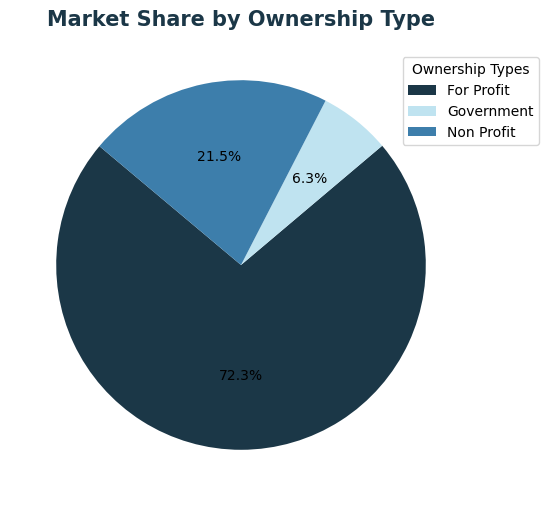

In [27]:
# Calculate the count of entries for each ownership type
ownership_summary = nursinghomedataREDUCED.groupby('Main Category').size()

# Calculate market percentage
market_percentage = (ownership_summary / ownership_summary.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(market_percentage, autopct='%1.1f%%', startangle=140,  colors=['#1B3747', '#BFE3F0', '#3D7EAB'])
plt.title('Market Share by Ownership Type', fontsize=15, color=('#1B3747'), weight='bold')
plt.legend(title="Ownership Types", labels=market_percentage.index, bbox_to_anchor=(.85, .95), loc='upper left', borderaxespad=0)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'pie_ Market Share by Ownership Type.png'))

plt.show()

---
<h2>Exploring Data: What outliers are there in Number of Residents Per Day</h2>

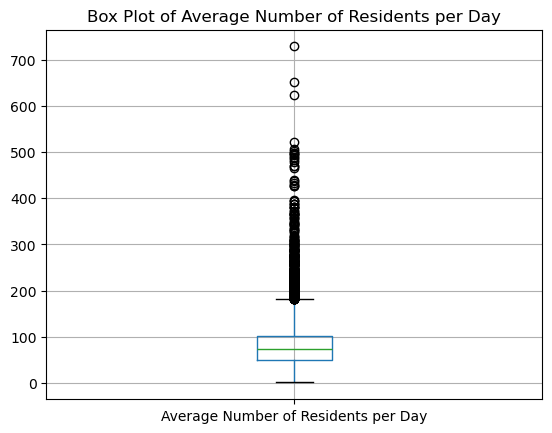

In [28]:
# Create a box plot
boxplot = nursinghomedataREDUCED.boxplot(column=['Average Number of Residents per Day'], return_type='axes',)

# Customize the plot
boxplot.set_xlabel('')
boxplot.set_title('Box Plot of Average Number of Residents per Day')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'Box Plot of Average Number of Residents per Day.png'))

plt.show()

In [29]:
nursinghomedataREDUCED['Average Number of Residents per Day'].describe()

count    14790.000000
mean        81.553482
std         48.347764
min          1.000000
25%         49.400000
50%         74.100000
75%        102.075000
max        728.500000
Name: Average Number of Residents per Day, dtype: float64

In [30]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = nursinghomedataREDUCED['Average Number of Residents per Day'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Average Number of Residents per Day is: {lowerq}")
print(f"The upper quartile of Average Number of Residents per Day is: {upperq}")
print(f"The interquartile range of Average Number of Residents per Day is: {iqr}")
print(f"The the median of Average Number of Residents per Day is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Average Number of Residents per Day is: 49.4
The upper quartile of Average Number of Residents per Day is: 102.07499999999999
The interquartile range of Average Number of Residents per Day is: 52.67499999999999
The the median of Average Number of Residents per Day is: 74.1 
Values below -29.61249999999999 could be outliers.
Values above 181.08749999999998 could be outliers.


In [31]:
# Count the number of cells with a value greater than 200 in the 'Average Number of Residents per Day' column
count_greater_than_182 = (nursinghomedataREDUCED['Average Number of Residents per Day'] > 182).sum()

print("Number of cells with a value greater than 182:", count_greater_than_182)

Number of cells with a value greater than 182: 483


---
<h2>Exploring Data: Regression and Correlation</h2>

In [32]:
nursinghomedata_minimal = nursinghomedataREDUCED.loc[:, ["Average Number of Residents per Day",
                                                         "Overall Rating", 
                                                         "Health Inspection Rating",
                                                         "Total number of nurse staff hours per resident per day on the weekend",
                                                         "Reported Total Nurse Staffing Hours per Resident per Day",
                                                        'Total Weighted Health Survey Score']]
nursinghomedata_minimal_dropped = nursinghomedata_minimal.dropna(how="any")
nursinghomedata_minimal_dropped.describe()

,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,Total number of nurse staff hours per resident per day on the weekend,Reported Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score
count,14348.000000,14348.000000,14348.000000,14348.000000,14348.000000,14348.000000
mean,82.211570,2.867647,2.789936,3.314208,3.784471,73.488796
std,48.381275,1.430718,1.273852,0.870105,0.961393,80.978875
min,2.900000,1.000000,1.000000,0.007560,0.009230,0.000000
25%,50.000000,2.000000,2.000000,2.827845,3.238632,25.333000
50%,74.700000,3.000000,3.000000,3.169535,3.618410,48.667000
75%,102.700000,4.000000,4.000000,3.634297,4.128565,91.833000
max,728.500000,5.000000,5.000000,13.838690,15.335630,1655.170000


The r value is: -0.212696199899576


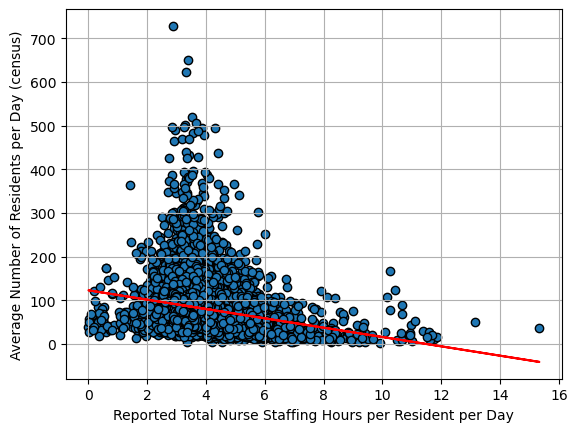

In [33]:
x_values = nursinghomedata_minimal_dropped['Reported Total Nurse Staffing Hours per Resident per Day']
y_values = nursinghomedata_minimal_dropped['Average Number of Residents per Day']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.ylabel("Average Number of Residents per Day (census)")
plt.xlabel("Reported Total Nurse Staffing Hours per Resident per Day")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (400, 100), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

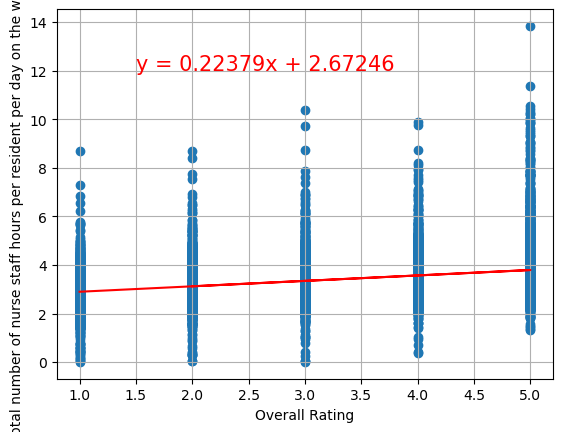

The r value is: 0.36797937743634274


In [34]:
y_values = nursinghomedata_minimal_dropped['Total number of nurse staff hours per resident per day on the weekend']
x_values = nursinghomedata_minimal_dropped['Overall Rating']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Overall Rating')
plt.ylabel('Total number of nurse staff hours per resident per day on the weekend')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (1.5, 12), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()

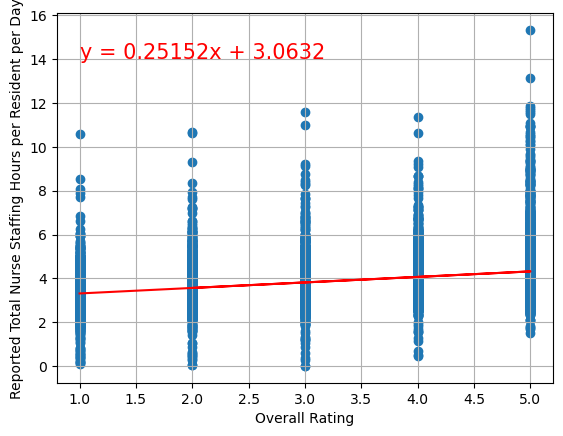

The r value is: 0.3743076796496769


In [35]:
y_values = nursinghomedata_minimal_dropped['Reported Total Nurse Staffing Hours per Resident per Day']
x_values = nursinghomedata_minimal_dropped['Overall Rating']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Overall Rating')
plt.ylabel('Reported Total Nurse Staffing Hours per Resident per Day')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (1, 14), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()

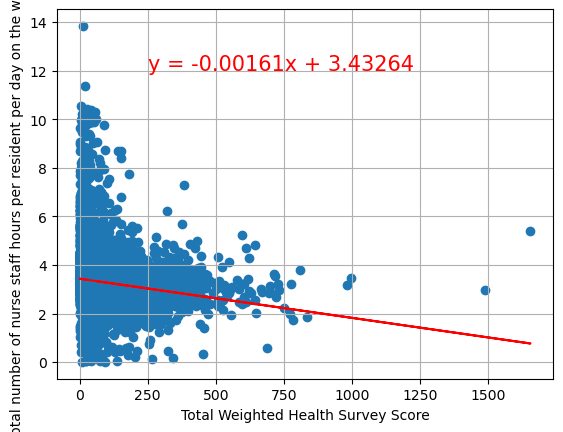

The r value is: -0.14998030188695952


In [36]:
y_values = nursinghomedata_minimal_dropped['Total number of nurse staff hours per resident per day on the weekend']
x_values = nursinghomedata_minimal_dropped['Total Weighted Health Survey Score']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Total Weighted Health Survey Score')
plt.ylabel('Total number of nurse staff hours per resident per day on the weekend')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (250, 12), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()

---
<h2>Exploring Data: John's Findings - Regression and Correlation</h2>

In [37]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataNurse_Score=nursinghomedata[[
        'Reported Nurse Aide Staffing Hours per Resident per Day', 
        'Total Weighted Health Survey Score']]
    

nursinghomedataNurse_Score.head()

,Reported Nurse Aide Staffing Hours per Resident per Day,Total Weighted Health Survey Score
0,2.54923,31.333
1,2.59139,6.667
2,3.50215,13.333
3,1.85428,20.667
4,2.21479,26.667


In [38]:
nursinghomedata.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [39]:
nursinghomedataNurse_Score.dropna(inplace=True)
row_count = nursinghomedata.shape[0]
print(row_count)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\2242404365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataNurse_Score.dropna(inplace=True)


The correlation between x and y is -0.13


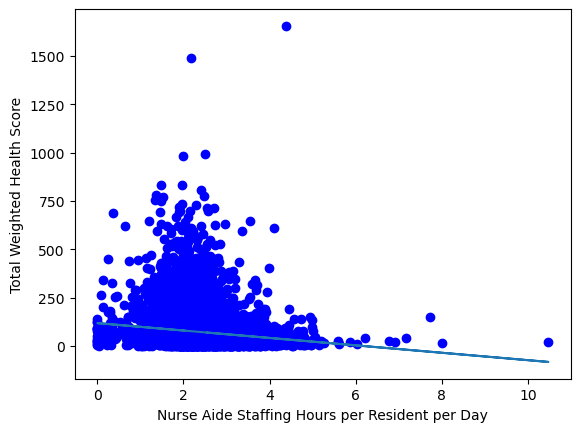

In [40]:
# Check correlation between "Reported Nurse Aide Staffing Hours per Resident per Day" against "Total Weighted Health Survey Score"
staffing_hours = nursinghomedataNurse_Score["Reported Nurse Aide Staffing Hours per Resident per Day"]
health_score = nursinghomedataNurse_Score["Total Weighted Health Survey Score"]

correlation = st.pearsonr(staffing_hours, health_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = staffing_hours
y_values = health_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(staffing_hours, health_score, color='b')
plt.plot(staffing_hours, regress_values)
plt.xlabel('Nurse Aide Staffing Hours per Resident per Day')
plt.ylabel('Total Weighted Health Score')
plt.grid(False)
plt.show()

In [41]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataOverall_Score=nursinghomedata[[
        'Overall Rating', 
        'Total Weighted Health Survey Score']]
    

nursinghomedataOverall_Score.head()

,Overall Rating,Total Weighted Health Survey Score
0,2.0,31.333
1,4.0,6.667
2,4.0,13.333
3,3.0,20.667
4,2.0,26.667


In [42]:
nursinghomedataOverall_Score.dropna(inplace=True)
row_count2 = nursinghomedata.shape[0]
print(row_count2)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\1779720979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataOverall_Score.dropna(inplace=True)


The correlation between x and y is -0.57


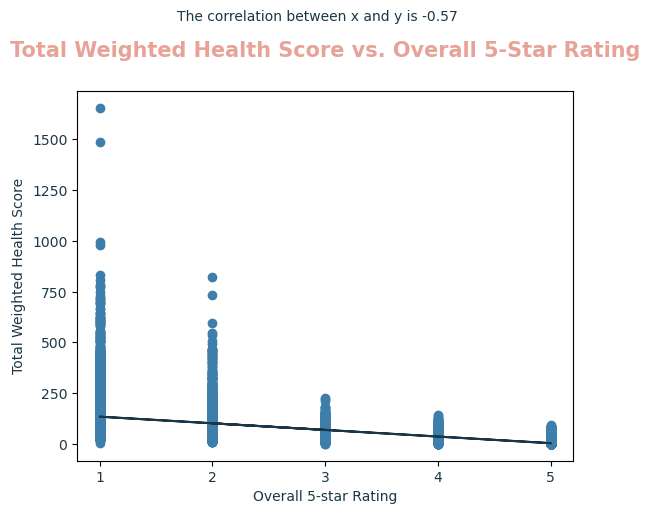

In [43]:
# Check correlation between "Overall Rating" against "Total Weighted Health Survey Score"
overall_score = nursinghomedataOverall_Score["Overall Rating"]
health_score = nursinghomedataOverall_Score["Total Weighted Health Survey Score"]

correlation = st.pearsonr(overall_score, health_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = health_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, health_score, color=('#3D7EAB'))
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Total Weighted Health Score', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.title("Total Weighted Health Score vs. Overall 5-Star Rating", pad = 25, fontsize=15, color=('#E8A398'), weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Total Weighted Health Score vs. Overall 5-Star Rating.png'))

plt.show()

In [44]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataLPN_Score=nursinghomedata[[
        'Overall Rating', 
        'Reported LPN Staffing Hours per Resident per Day']]
    

nursinghomedataLPN_Score.head()

,Overall Rating,Reported LPN Staffing Hours per Resident per Day
0,2.0,0.43216
1,4.0,0.82293
2,4.0,0.61118
3,3.0,0.81347
4,2.0,0.93906


In [45]:
nursinghomedataLPN_Score.dropna(inplace=True)
row_count3 = nursinghomedata.shape[0]
print(row_count3)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\1252164449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataLPN_Score.dropna(inplace=True)


The correlation between x and y is 0.04


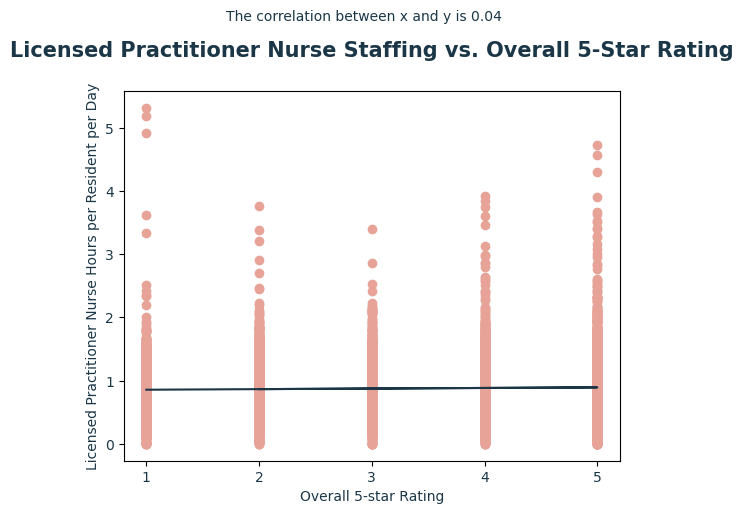

In [46]:
# Check correlation between "Reported LPN Staffing Hours per Resident per Day" against "Overall Rating"
overall_score = nursinghomedataLPN_Score["Overall Rating"]
LPN_score = nursinghomedataLPN_Score["Reported LPN Staffing Hours per Resident per Day"]

correlation = st.pearsonr(overall_score, LPN_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = LPN_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, LPN_score, color='#E8A398')
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Licensed Practitioner Nurse Hours per Resident per Day', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.title("Licensed Practitioner Nurse Staffing vs. Overall 5-Star Rating", color=('#1B3747'), pad = 25, fontsize=15, weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Licensed Practitioner Nurse Staffing vs. Overall 5-Star Rating.png'))

plt.show()

In [47]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataRN_Score=nursinghomedata[[
        'Overall Rating', 
        'Reported RN Staffing Hours per Resident per Day']]
    

nursinghomedataRN_Score.head()

,Overall Rating,Reported RN Staffing Hours per Resident per Day
0,2.0,1.20016
1,4.0,0.75365
2,4.0,1.06511
3,3.0,0.52198
4,2.0,0.35255


In [48]:
nursinghomedataRN_Score.dropna(inplace=True)
row_count4 = nursinghomedata.shape[0]
print(row_count4)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\1703606010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataRN_Score.dropna(inplace=True)


The correlation between x and y is 0.35


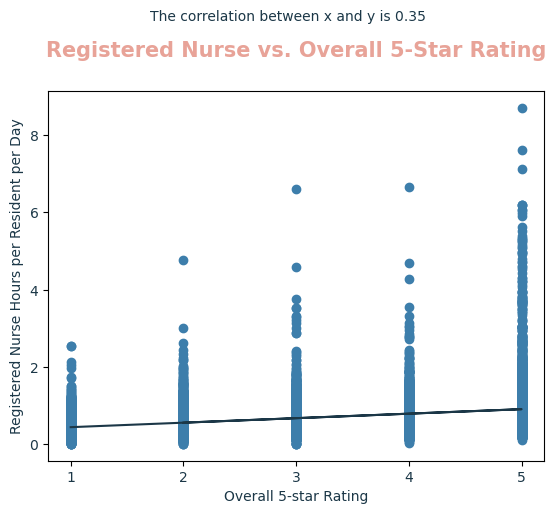

In [49]:
# Check correlation between "Reported RN Staffing Hours per Resident per Day" against "Overall Rating"
overall_score = nursinghomedataRN_Score["Overall Rating"]
RN_score = nursinghomedataRN_Score["Reported RN Staffing Hours per Resident per Day"]

correlation = st.pearsonr(overall_score, RN_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = RN_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, RN_score, color=('#3D7EAB'))
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Registered Nurse Hours per Resident per Day', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.title("Registered Nurse vs. Overall 5-Star Rating", pad = 25, fontsize=15, color=('#E8A398'), weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Registered Nurse vs. Overall 5-Star Rating.png'))

plt.show()

In [50]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataLic_Score=nursinghomedata[[
        'Overall Rating', 
        'Reported Licensed Staffing Hours per Resident per Day']]
    

nursinghomedataLic_Score.head()

,Overall Rating,Reported Licensed Staffing Hours per Resident per Day
0,2.0,1.63231
1,4.0,1.57659
2,4.0,1.67630
3,3.0,1.33545
4,2.0,1.29161


In [51]:
nursinghomedataLic_Score.dropna(inplace=True)
row_count5 = nursinghomedata.shape[0]
print(row_count5)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\2935616538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataLic_Score.dropna(inplace=True)


The correlation between x and y is 0.31


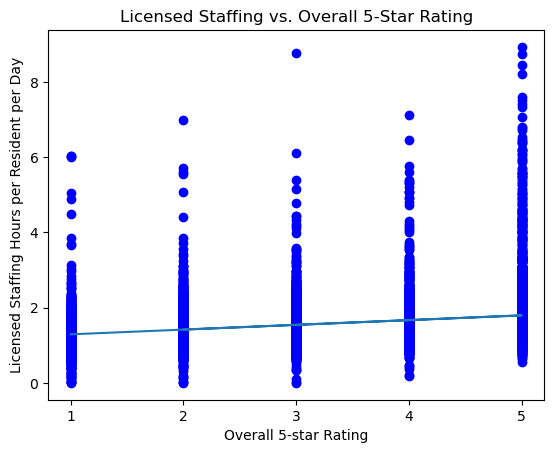

In [52]:
# Check correlation between "Reported Licensed Staffing Hours per Resident per Day" against "Overall Rating"
overall_score = nursinghomedataLic_Score["Overall Rating"]
Lic_score = nursinghomedataLic_Score["Reported Licensed Staffing Hours per Resident per Day"]

correlation = st.pearsonr(overall_score, Lic_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = Lic_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, Lic_score, color='b')
plt.plot(overall_score, regress_values)
plt.xlabel('Overall 5-star Rating')
plt.ylabel('Licensed Staffing Hours per Resident per Day')
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1))
plt.title("Licensed Staffing vs. Overall 5-Star Rating")
plt.grid(False)
plt.show()

In [53]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataAide_Score=nursinghomedata[[
        'Overall Rating', 
        'Reported Nurse Aide Staffing Hours per Resident per Day']]
    

nursinghomedataAide_Score.head()

,Overall Rating,Reported Nurse Aide Staffing Hours per Resident per Day
0,2.0,2.54923
1,4.0,2.59139
2,4.0,3.50215
3,3.0,1.85428
4,2.0,2.21479


In [54]:
	
nursinghomedataAide_Score.dropna(inplace=True)
row_count6 = nursinghomedata.shape[0]
print(row_count6)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\2926960014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataAide_Score.dropna(inplace=True)


The correlation between x and y is 0.31


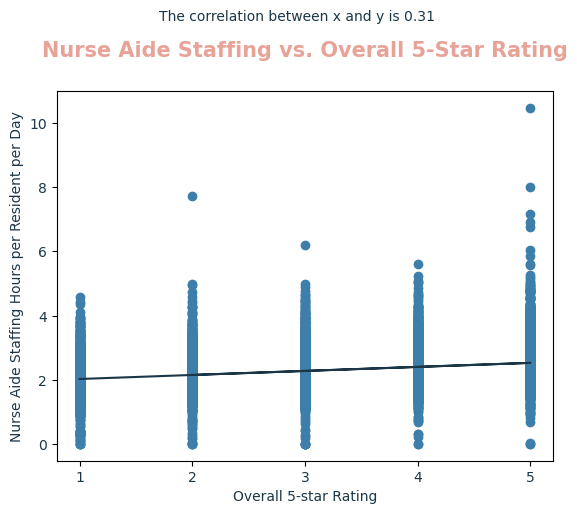

In [55]:
# Check correlation between "Reported Nurse Aide Staffing Hours per Resident per Day" against "Overall Rating"
overall_score = nursinghomedataAide_Score["Overall Rating"]
Aide_score = nursinghomedataAide_Score["Reported Nurse Aide Staffing Hours per Resident per Day"]

correlation = st.pearsonr(overall_score, Aide_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = Aide_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, Aide_score, color=('#3D7EAB'))
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Nurse Aide Staffing Hours per Resident per Day', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.title("Nurse Aide Staffing vs. Overall 5-Star Rating", pad = 25, fontsize=15, color=('#E8A398'), weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Nurse Aide Staffing vs. Overall 5-Star Rating.png'))


plt.show()

In [56]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataComp_Score=nursinghomedata[[
        'Overall Rating', 
        'Number of Substantiated Complaints']]
    

nursinghomedataComp_Score.head()

,Overall Rating,Number of Substantiated Complaints
0,2.0,0
1,4.0,0
2,4.0,0
3,3.0,0
4,2.0,1


In [57]:
nursinghomedataComp_Score.dropna(inplace=True)
row_count7 = nursinghomedata.shape[0]
print(row_count7)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\1886704467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataComp_Score.dropna(inplace=True)


The correlation between x and y is -0.38


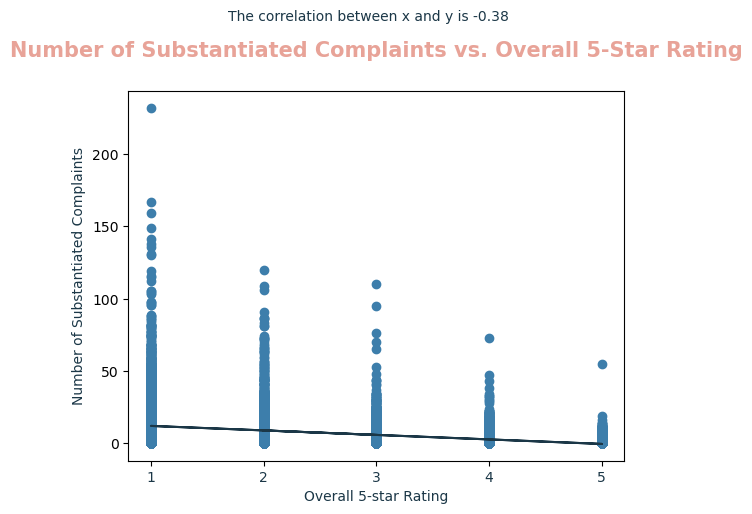

In [58]:
# Check correlation between "Number of Substantiated Complaints" against "Overall Rating"
overall_score = nursinghomedataComp_Score["Overall Rating"]
Comp_score = nursinghomedataComp_Score["Number of Substantiated Complaints"]

correlation = st.pearsonr(overall_score, Comp_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = Comp_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, Comp_score, color=('#3D7EAB'))
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Number of Substantiated Complaints', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.title("Number of Substantiated Complaints vs. Overall 5-Star Rating", pad = 25, fontsize=15, color=('#E8A398'), weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Number of Substantiated Complaints vs. Overall 5-Star Rating.png'))

plt.show()

In [59]:
# reducing to only look at Nurse Staffing vs. Total Health Score
nursinghomedataFine_Score=nursinghomedata[[
        'Overall Rating', 
        'Total Amount of Fines in Dollars']]
    

nursinghomedataFine_Score.head()

,Overall Rating,Total Amount of Fines in Dollars
0,2.0,24644.14
1,4.0,0.00
2,4.0,0.00
3,3.0,0.00
4,2.0,975.00


In [60]:
nursinghomedataFine_Score.dropna(inplace=True)
row_count8 = nursinghomedata.shape[0]
print(row_count8)

14860


C:\Users\aacha\AppData\Local\Temp\ipykernel_9340\569988679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nursinghomedataFine_Score.dropna(inplace=True)


The correlation between x and y is -0.4


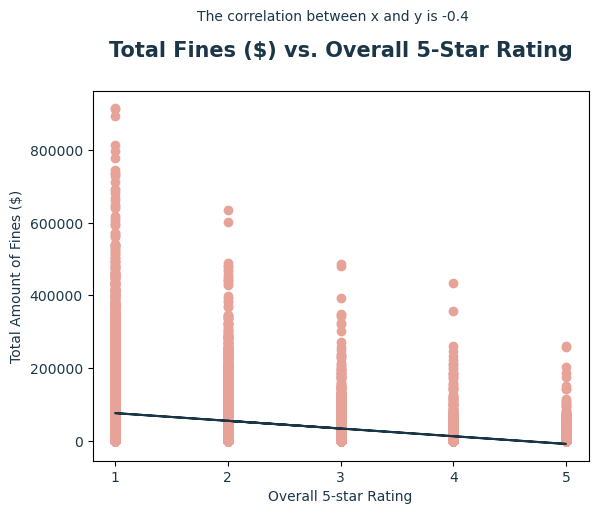

In [61]:
# Check correlation between "Total Amount of Fines in Dollars" against "Overall Rating"
overall_score = nursinghomedataFine_Score["Overall Rating"]
Fine_score = nursinghomedataFine_Score["Total Amount of Fines in Dollars"]

correlation = st.pearsonr(overall_score, Fine_score)
print(f"The correlation between x and y is {round(correlation[0],2)}")

# Create scatter plot
x_values = overall_score
y_values = Fine_score
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(overall_score, Fine_score, color='#E8A398')
plt.plot(overall_score, regress_values, color=('#1B3747'))
plt.xlabel('Overall 5-star Rating', color=('#1B3747'), fontsize=10)
plt.ylabel('Total Amount of Fines ($)', color=('#1B3747'), fontsize=10)
plt.xticks(range(int(min(overall_score)), int(max(overall_score)) + 1), color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.title("Total Fines ($) vs. Overall 5-Star Rating", color=('#1B3747'), pad = 25, fontsize=15, weight='bold')
plt.suptitle(f"The correlation between x and y is {round(correlation[0],2)}", y=1.05, fontsize=10, color=('#1B3747'))
plt.grid(False)

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Total Fines ($) vs. Overall 5-Star Rating.png'))

plt.show()

In [62]:
popfile_path = Path("Resources/StatePopulation.csv")
statepopulationDATA=pd.read_csv(popfile_path)
statepopulationDATA_sorted = statepopulationDATA.sort_values(by='State')
statepopulationDATA_sorted.sample(5)

,State,STATE NAME,Number of Facilities,State Population,"Facilities per 10,000 people"
7,GA,Georgia,357,"11,029,227",31
43,RI,Rhode Island,74,"1,095,962",15
25,KY,Kentucky,270,"4,526,154",17
22,SC,South Carolina,189,"5,373,555",28
33,KS,Kansas,307,"2,940,546",10


In [63]:
nursinghomedata_usstates = nursinghomedata[~nursinghomedata['State'].isin(['GU', 'PR'])]

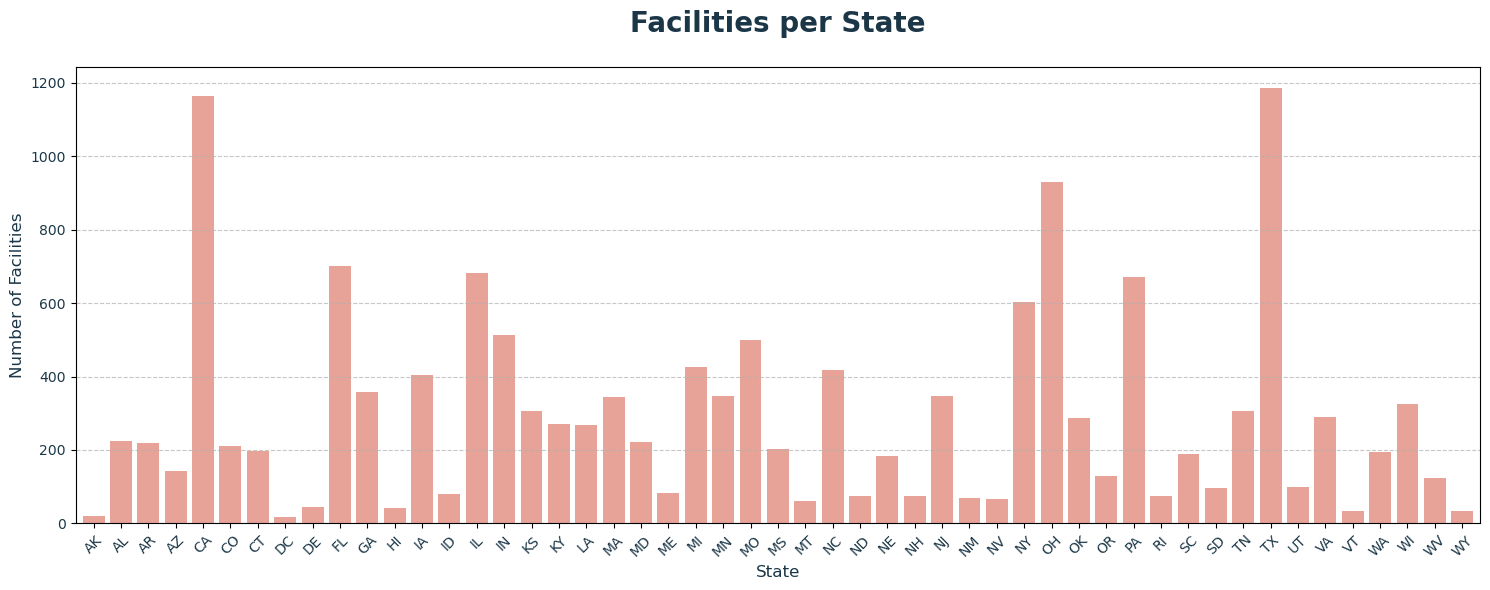

In [64]:
facilityperstate = nursinghomedata_usstates.groupby("State")["Provider Name"].count()

plt.figure(figsize=(15, 6))
facilityperstate.plot(kind='bar', color='#E8A398', width=0.8)  
plt.title('Facilities per State', color=('#1B3747'), pad = 25, fontsize=20, weight='bold')
plt.xlabel('State', color=('#1B3747'), fontsize=12)
plt.ylabel('Number of Facilities', color=('#1B3747'), fontsize=12)
plt.xticks(rotation=45, color=('#1B3747'))
plt.yticks(color=('#1B3747'))
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
ax.set_facecolor('#FCF1E0')
fig.patch.set_facecolor('#FCF1E0')

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar_Facilities per State.png'))

plt.show()

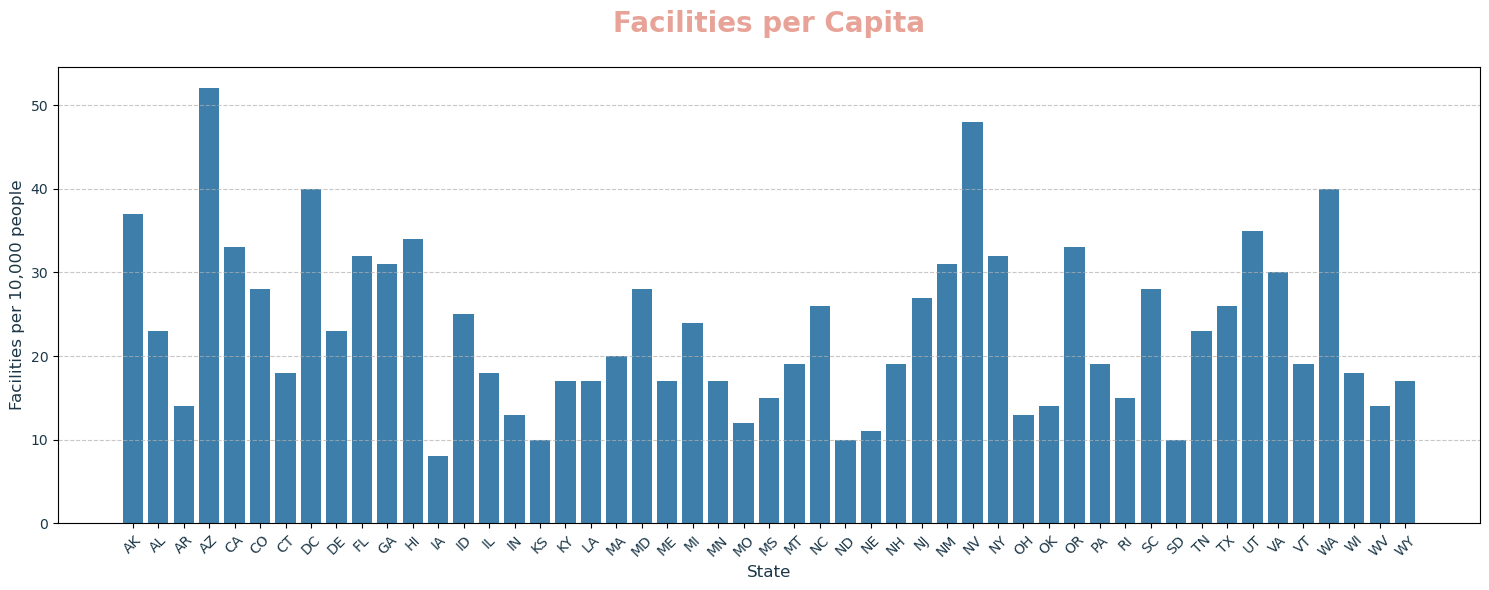

In [65]:
xaxis_state2 = statepopulationDATA_sorted['State']
yaxis_numberper = statepopulationDATA_sorted['Facilities per 10,000 people']


plt.figure(figsize=(15, 6))
plt.bar(xaxis_state2, yaxis_numberper, color=('#3D7EAB'), width=0.8)
plt.xlabel('State', color=('#1B3747'), fontsize=12)
plt.ylabel('Facilities per 10,000 people', color=('#1B3747'), fontsize=12)
plt.title('Facilities per Capita', pad = 25, fontsize=20, color=('#E8A398'), weight='bold')
plt.xticks(rotation=45, color=('#1B3747')) 
plt.yticks(color=('#1B3747'))
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'bar_Facilities per Capita.png'))

plt.show()

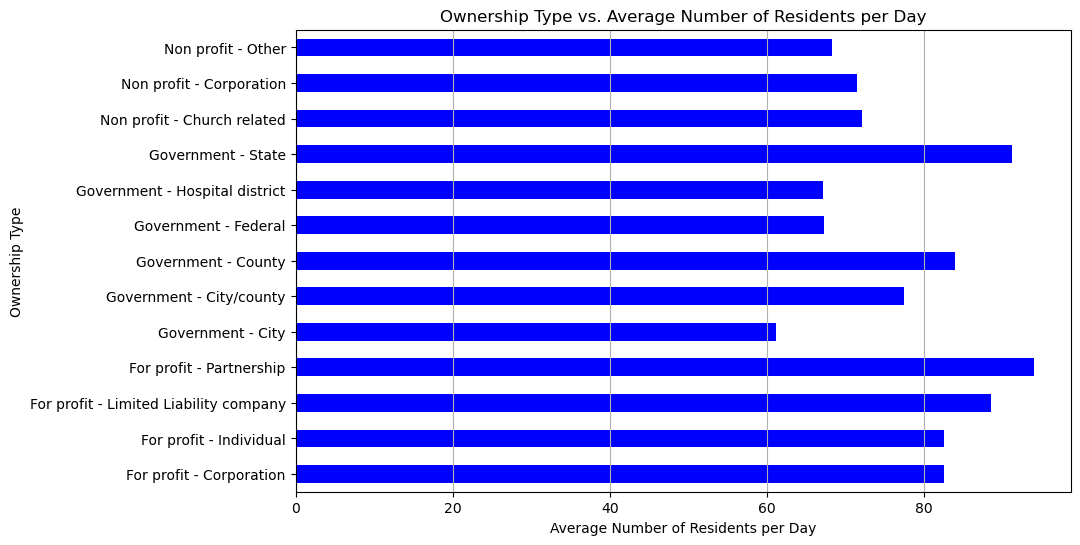

In [66]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Average Number of Residents per Day"].mean()

plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue']) 
plt.title('Ownership Type vs. Average Number of Residents per Day')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Residents per Day')
plt.xticks(rotation=0)  
plt.grid(axis='x') 

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'barH_Ownership Type vs. Average Number of Residents per Day.png'))


plt.show()

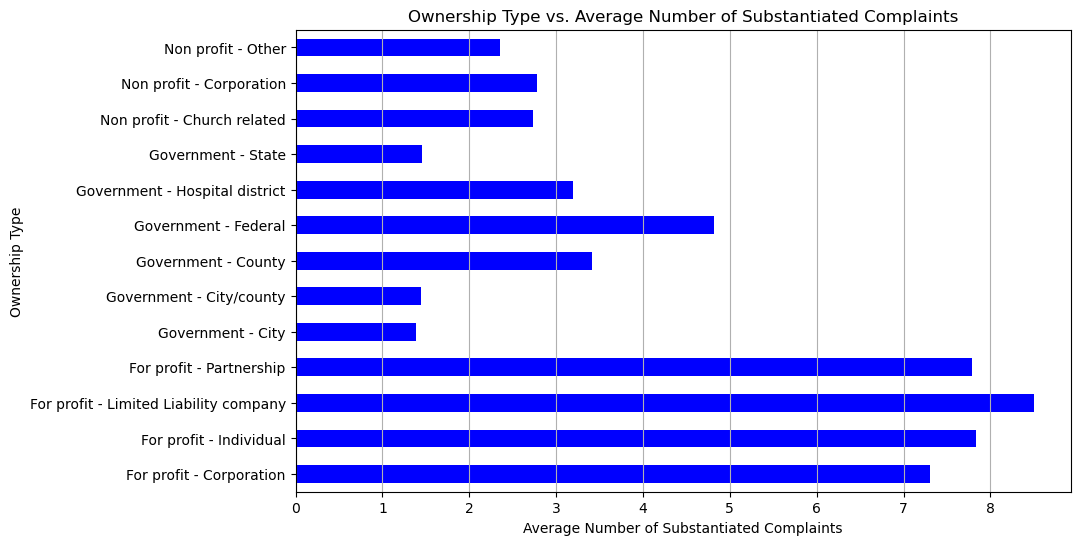

In [67]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Number of Substantiated Complaints"].mean()


plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue']) 
plt.title('Ownership Type vs. Average Number of Substantiated Complaints')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Substantiated Complaints')
plt.xticks(rotation=0) 
plt.grid(axis='x')  

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'barH_Ownership Type vs. Average Number of Substantiated Complaints.png'))

plt.show()

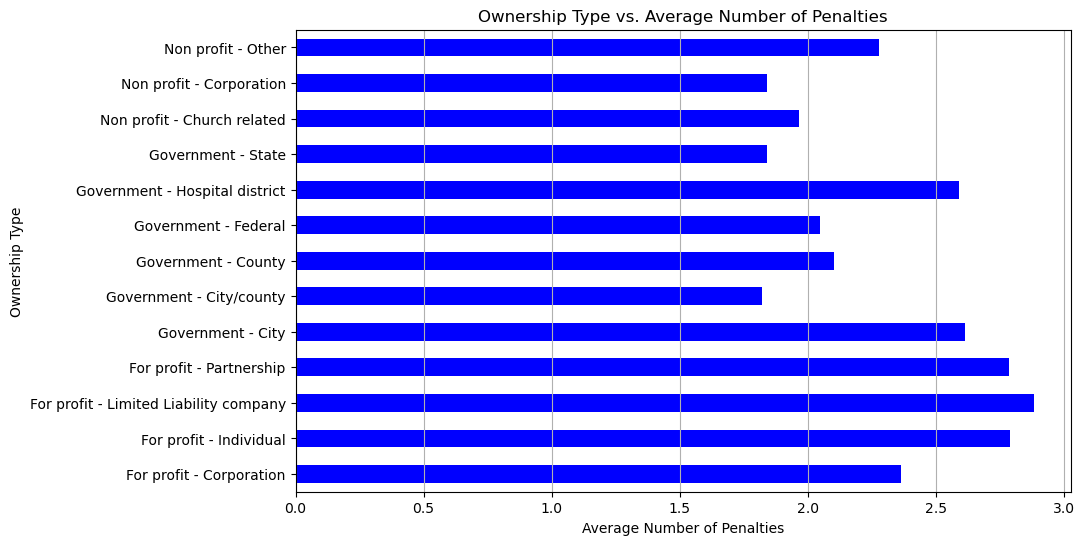

In [68]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Total Number of Penalties"].mean()


plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue'])  
plt.title('Ownership Type vs. Average Number of Penalties')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Penalties')
plt.xticks(rotation=0)  
plt.grid(axis='x')  

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'barH_Ownership Type vs. Average Number of Penalties.png'))

plt.show()

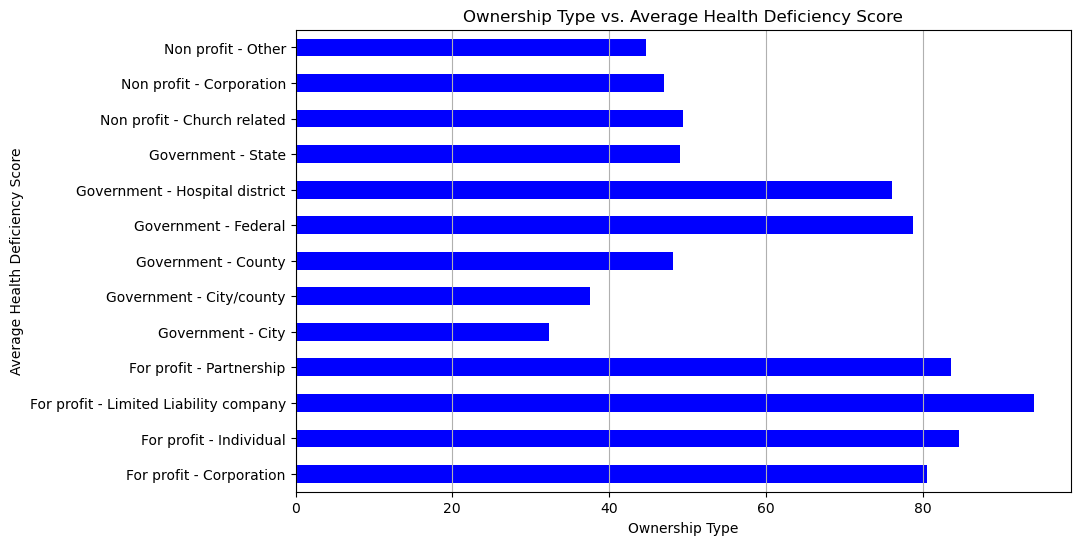

In [69]:
nursinghomedata['Rating Cycle 1 Health Deficiency Score'] = pd.to_numeric(nursinghomedata['Rating Cycle 1 Health Deficiency Score'], errors='coerce')

ownership_avg_penalties = nursinghomedata.groupby("Ownership Type")["Rating Cycle 1 Health Deficiency Score"].mean()

plt.figure(figsize=(10, 6))
ownership_avg_penalties.plot(kind='barh', color=['blue'])  
plt.title('Ownership Type vs. Average Health Deficiency Score')
plt.xlabel('Ownership Type')
plt.ylabel('Average Health Deficiency Score')
plt.xticks(rotation=0)  
plt.grid(axis='x')  

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'barH_Ownership Type vs. Average Health Deficiency Score.png'))


plt.show()

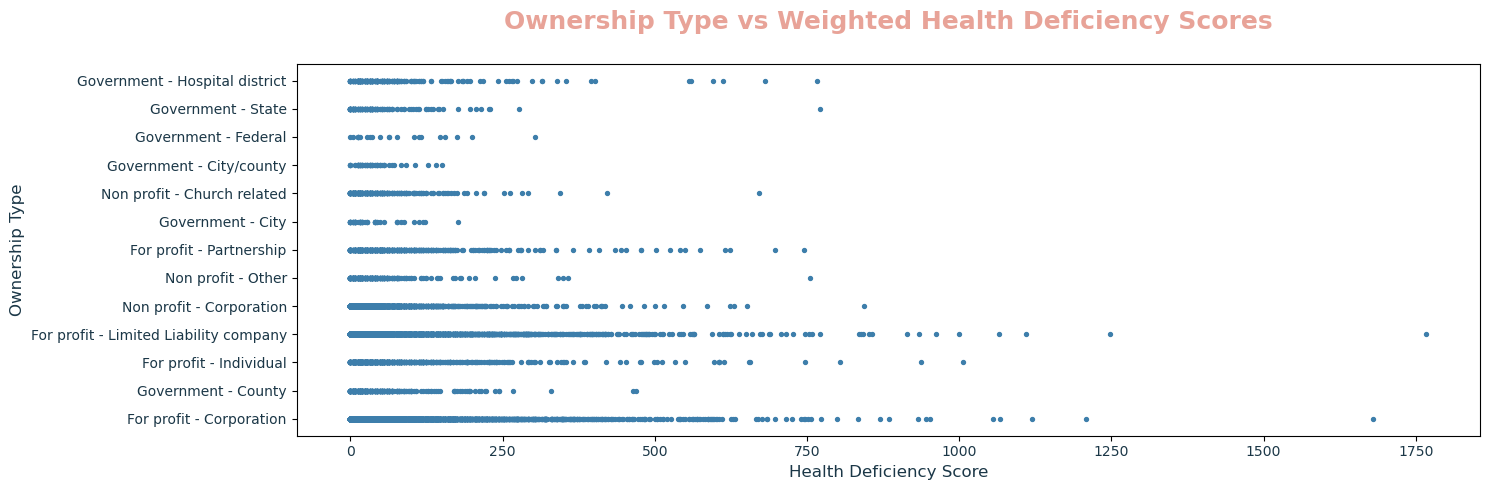

In [70]:
xaxis_state2 = nursinghomedata['Ownership Type']
yaxis_numberper = nursinghomedata['Rating Cycle 1 Health Deficiency Score']

plt.figure(figsize=(15, 5))
plt.scatter(yaxis_numberper, xaxis_state2,s=8 , color=('#3D7EAB'))
plt.xlabel('Health Deficiency Score', color=('#1B3747'), fontsize=12)
plt.ylabel('Ownership Type', color=('#1B3747'), fontsize=12)
plt.title('Ownership Type vs Weighted Health Deficiency Scores', pad=25, color=('#E8A398'), fontsize=18, fontweight='bold')
plt.xticks(rotation=0, color=('#1B3747'))
plt.yticks(color=('#1B3747'))

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatterH_Ownership Type vs Weighted Health Deficiency Scores.png'))

plt.tight_layout()  
plt.show()

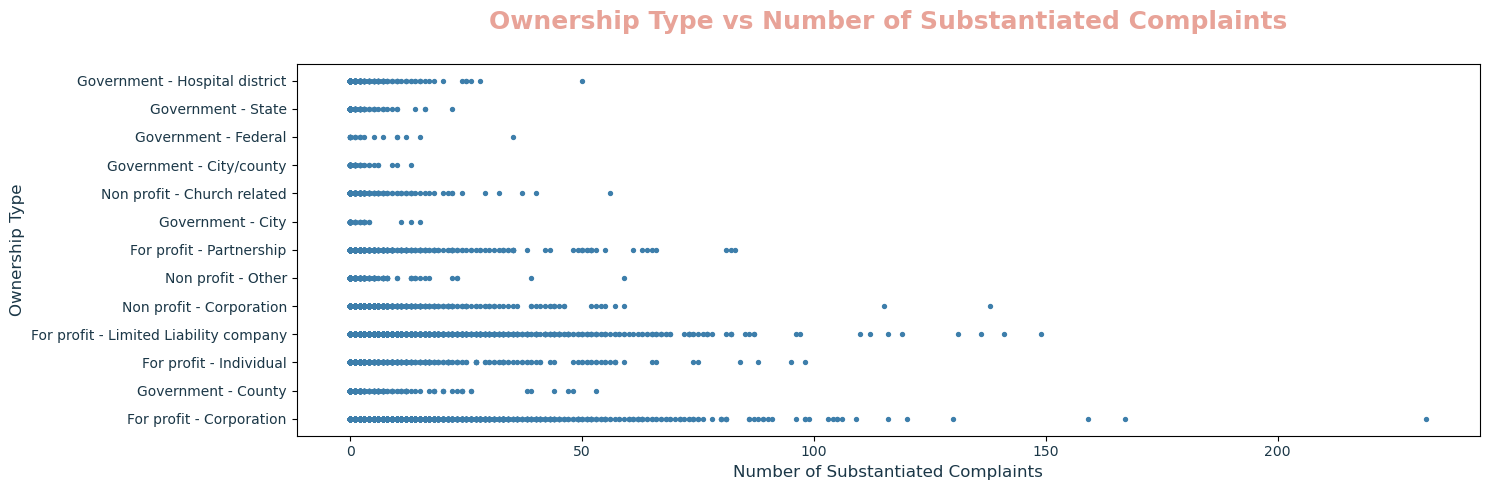

In [71]:
xaxis_state2 = nursinghomedata['Ownership Type']
yaxis_numberper = nursinghomedata['Number of Substantiated Complaints']

plt.figure(figsize=(15, 5))
plt.scatter(yaxis_numberper, xaxis_state2,s=8 , color=('#3D7EAB'))
plt.xlabel('Number of Substantiated Complaints', color=('#1B3747'), fontsize=12)
plt.ylabel('Ownership Type', color=('#1B3747'), fontsize=12)
plt.title('Ownership Type vs Number of Substantiated Complaints', pad=25, color=('#E8A398'), fontsize=18, fontweight='bold')
plt.xticks(rotation=0, color=('#1B3747'))
plt.yticks(color=('#1B3747'))

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatterH_Ownership Type vs Number of Substantiated Complaints.png'))


plt.tight_layout()  
plt.show()

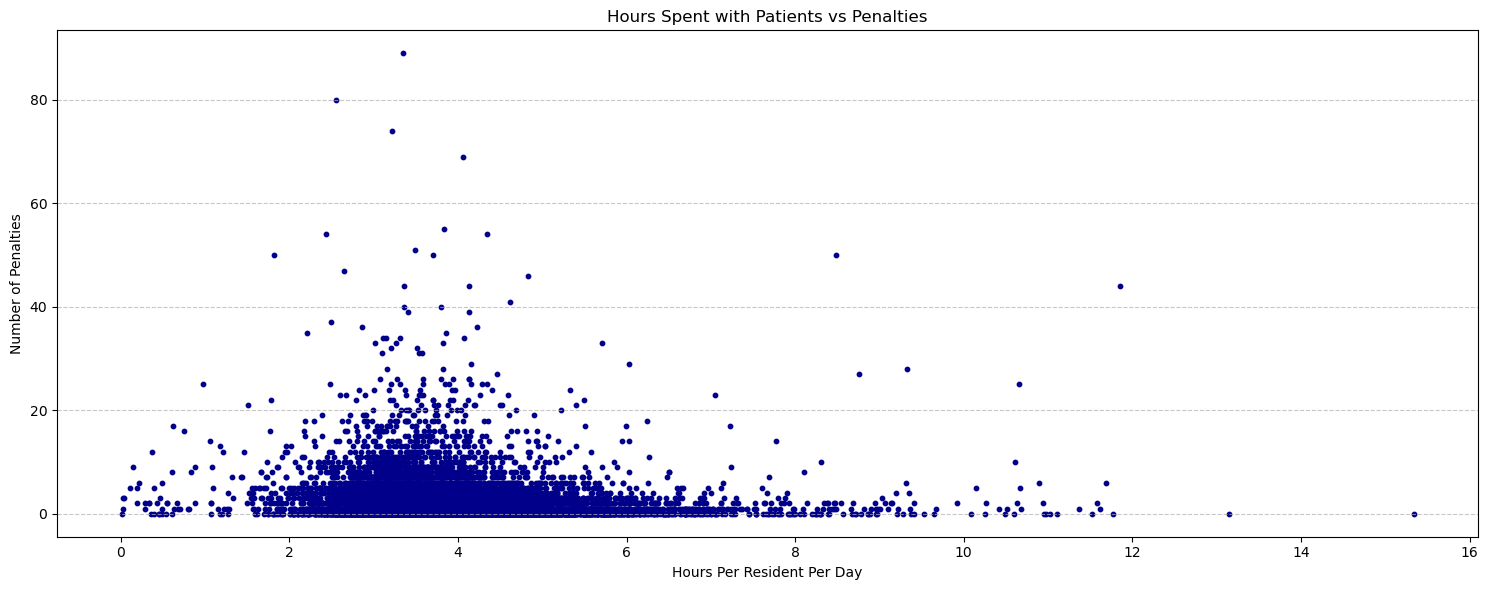

In [72]:
xaxis_state2 = nursinghomedata['Reported Total Nurse Staffing Hours per Resident per Day']
yaxis_numberper = nursinghomedata['Total Number of Penalties']

plt.figure(figsize=(15, 6))
plt.scatter(xaxis_state2, yaxis_numberper, s=10, color='darkblue')
plt.xlabel('Hours Per Resident Per Day')
plt.ylabel('Number of Penalties')
plt.title('Hours Spent with Patients vs Penalties')

plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'scatter_Hours Spent with Patients vs Penalties.png'))


plt.tight_layout()  
plt.show()

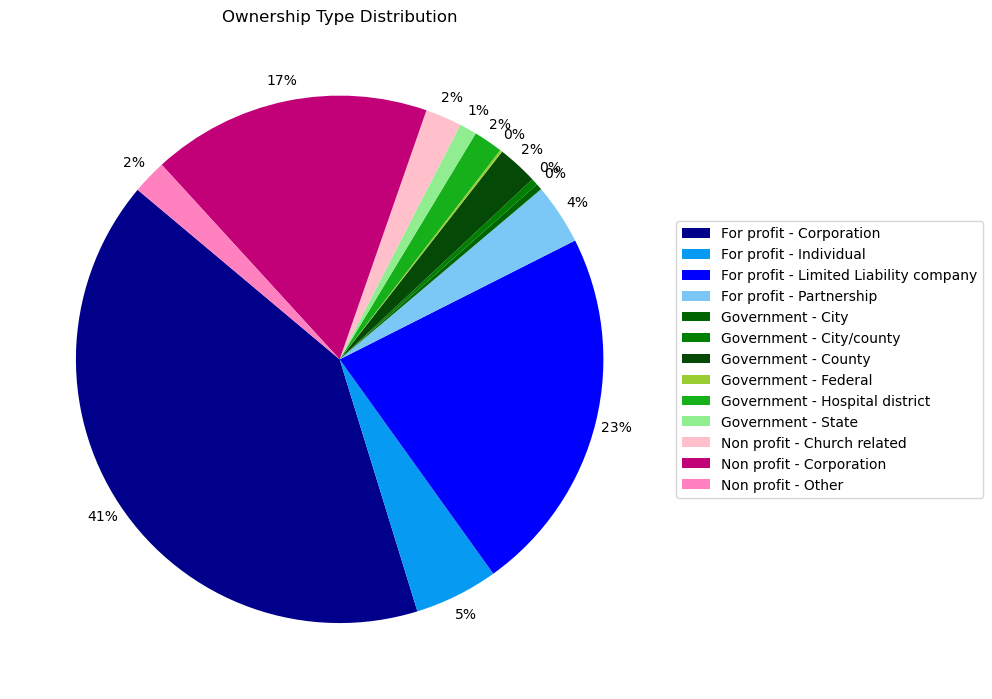

In [73]:
ownership_counts = nursinghomedata['Ownership Type'].value_counts()
ownership_counts_sorted = ownership_counts.sort_values(ascending=False).sort_index()

ownership_colors = ['darkblue', 'xkcd:azure', 'blue', 'xkcd:lightblue', 'darkgreen', 'green', 'xkcd:darkgreen', 'yellowgreen', 'xkcd:green', 'lightgreen', 'pink', 'xkcd:magenta', 'xkcd:pink']

plt.figure(figsize=(10, 10))
pie = plt.pie(ownership_counts_sorted, autopct='%1.f%%', pctdistance=1.08 , startangle=140, colors=ownership_colors)
plt.title('Ownership Type Distribution')

plt.legend(pie[0], ownership_counts_sorted.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'pie_Ownership Type Distribution.png'))

plt.tight_layout()
plt.show()

In [74]:
abuse_icon_n = nursinghomedata[nursinghomedata['Abuse Icon'] == 'N']
abuse_icon_y = nursinghomedata[nursinghomedata['Abuse Icon'] == 'Y']

In [75]:
n_latitudes = abuse_icon_n['Latitude'].tolist()
n_longitudes = abuse_icon_n['Longitude'].tolist()

y_latitudes = abuse_icon_y['Latitude'].tolist()
y_longitudes = abuse_icon_y['Longitude'].tolist()

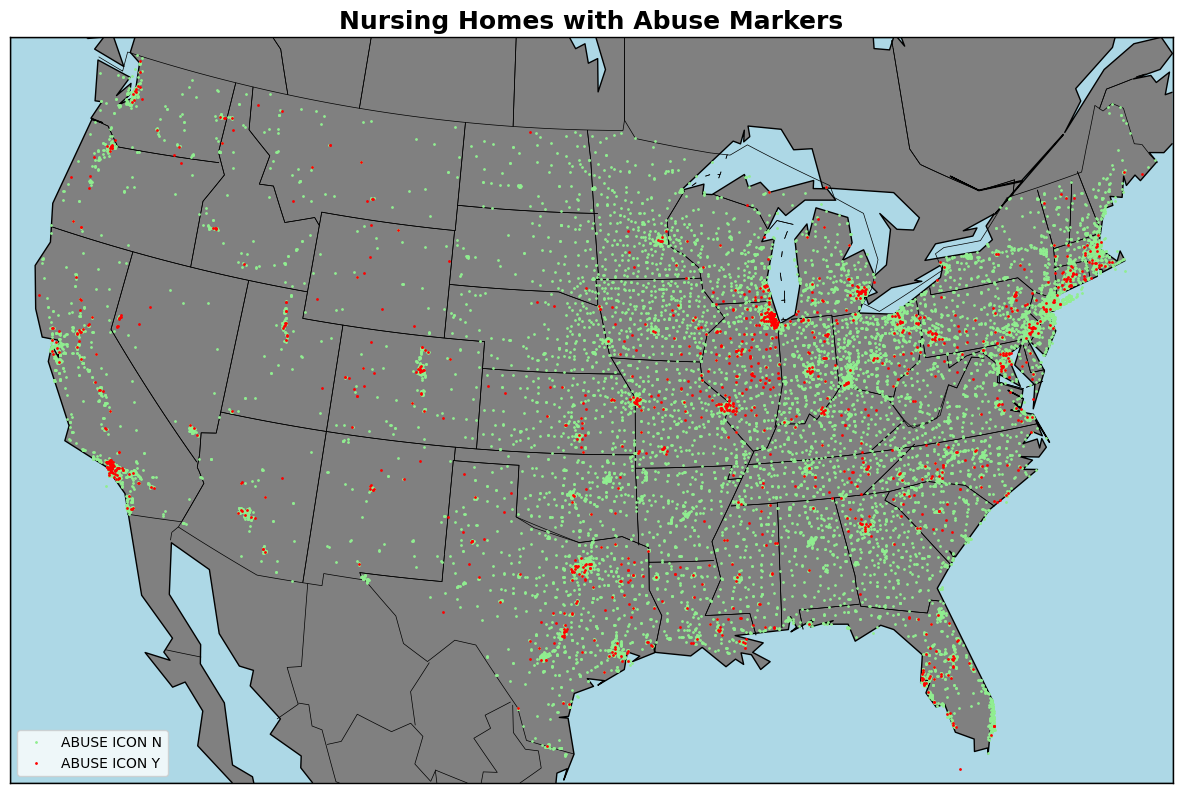

In [76]:
plt.figure(figsize=(15, 15))
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='gray', lake_color='lightblue')
map.drawcoastlines()
map.drawcountries()
map.drawstates()
# map.bluemarble()

# Plot green dots
x_n, y_n = map(n_longitudes, n_latitudes)
map.plot(x_n, y_n, 'o', color='lightgreen', markersize=1, label='ABUSE ICON N')

# Plot red dots 
x_y, y_y = map(y_longitudes, y_latitudes)
map.plot(x_y, y_y, 'o', color= 'red',  markersize=1, label='ABUSE ICON Y')

plt.title('Nursing Homes with Abuse Markers', fontsize=18, fontweight='bold')
plt.legend()

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'map_Nursing Homes with Abuse Markers.png'))

plt.show()

In [77]:
complaints_above_100 = nursinghomedata[nursinghomedata['Number of Substantiated Complaints'] >= 100]
complaints_above_75 = nursinghomedata[(nursinghomedata['Number of Substantiated Complaints'] >= 75) & (nursinghomedata['Number of Substantiated Complaints'] < 99)]
complaints_above_50 = nursinghomedata[(nursinghomedata['Number of Substantiated Complaints'] >= 50) & (nursinghomedata['Number of Substantiated Complaints'] < 74)]
complaints_above_25 = nursinghomedata[(nursinghomedata['Number of Substantiated Complaints'] >= 25) & (nursinghomedata['Number of Substantiated Complaints'] < 49)]
complaints_above_0 = nursinghomedata[(nursinghomedata['Number of Substantiated Complaints'] > 0) & (nursinghomedata['Number of Substantiated Complaints'] < 24)]
no_complaints = nursinghomedata[nursinghomedata['Number of Substantiated Complaints'] == 0]

In [78]:
latitudes100 = complaints_above_100['Latitude'].tolist()
longitudes100 = complaints_above_100['Longitude'].tolist()

latitudes75 = complaints_above_75['Latitude'].tolist()
longitudes75 = complaints_above_75['Longitude'].tolist()

latitudes50 = complaints_above_50['Latitude'].tolist()
longitudes50 = complaints_above_50['Longitude'].tolist()

latitudes25 = complaints_above_25['Latitude'].tolist()
longitudes25 = complaints_above_25['Longitude'].tolist()

latitudes0 = complaints_above_0['Latitude'].tolist()
longitudes0 = complaints_above_0['Longitude'].tolist()

latitudes_none = no_complaints['Latitude'].tolist()
longitudes_none = no_complaints['Longitude'].tolist()

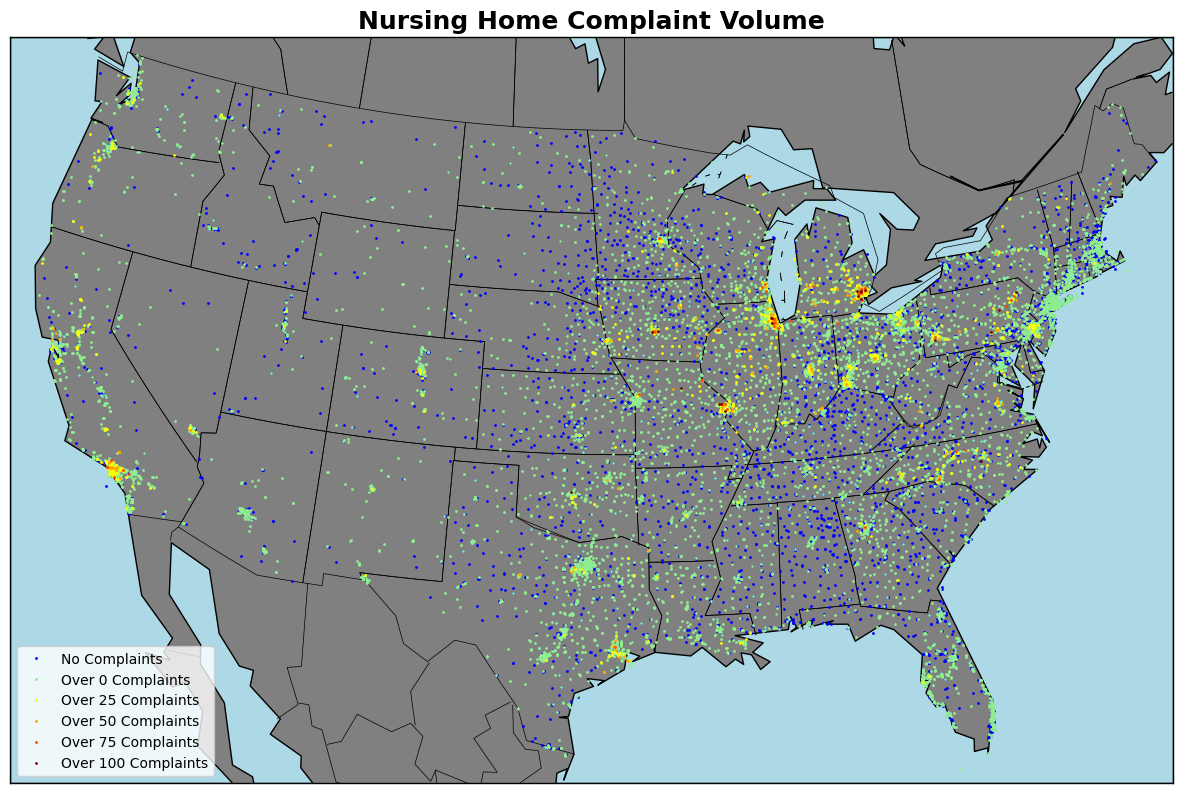

In [79]:
plt.figure(figsize=(15, 15))
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='gray', lake_color='lightblue')
map.drawcoastlines()
map.drawcountries()
map.drawstates()

x_na, y_na = map(longitudes_none, latitudes_none)
map.plot(x_na, y_na, 'o', color='blue', markersize=1, label='No Complaints')

# Plot above 0
x_0, y_0 = map(longitudes0, latitudes0)
map.plot(x_0, y_0, 'o', color='lightgreen', markersize=1, label='Over 0 Complaints')

# Plot above 25
x_25, y_25 = map(longitudes25, latitudes25)
map.plot(x_25, y_25, 'o', color='yellow', markersize=1, label='Over 25 Complaints')

# Plot above 50
x_50, y_50 = map(longitudes50, latitudes50)
map.plot(x_50, y_50, 'o', color='orange', markersize=1, label='Over 50 Complaints')

# Plot above 50
x_75, y_75 = map(longitudes75, latitudes75)
map.plot(x_75, y_75, 'o', color='orangered', markersize=1, label='Over 75 Complaints')

# Plot above 100
x_100, y_100 = map(longitudes100, latitudes100)
map.plot(x_100, y_100, 'o', color='maroon', markersize=1, label='Over 100 Complaints')


plt.title('Nursing Home Complaint Volume', fontsize=18, fontweight='bold')
plt.legend()

# Save image to folder
plt.savefig(os.path.join(highresfolder, 'map_Nursing Home Complaint Volume.png'))


plt.show()